In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')

In [5]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [6]:
#there are 571 rows and 43 columns
#one is subject and one CGPA is our target
#remaning columns are subject 

In [7]:
df.nunique()

Seat No.     571
PH-121        13
HS-101        12
CY-105        13
HS-105/12     13
MT-111        13
CS-105        11
CS-106        13
EL-102        13
EE-119        12
ME-107        13
CS-107        14
HS-205/20     13
MT-222        14
EE-222        13
MT-224        14
CS-210        14
CS-211        14
CS-203        13
CS-214        13
EE-217        13
CS-212        12
CS-215        14
MT-331        12
EF-303        12
HS-304        14
CS-301        12
CS-302        11
TC-383        12
MT-442        12
EL-332        13
CS-318        14
CS-306        13
CS-312        14
CS-317        12
CS-403        11
CS-421        13
CS-406        14
CS-414        13
CS-419        12
CS-423        12
CS-412        13
CGPA         491
dtype: int64

In [8]:
#subject data is categorical data


In [9]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [10]:
#there are many null values each column

#seat is not helpful for analysis so dropping it

In [11]:
df.drop('Seat No.',axis=1, inplace=True)

In [12]:
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [13]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

In [14]:
df2=df.drop('CGPA',axis=1)
X=df['CGPA']

In [15]:
"""" columns needs to be encoded and null values are to be filled.Using ordinal encoder and simpleimputer to treat both""""

SyntaxError: EOL while scanning string literal (3612743013.py, line 1)

In [16]:
ordinal_encoder = OrdinalEncoder()

df_encoded = pd.DataFrame(ordinal_encoder.fit_transform(df2), columns=df2.columns)

In [17]:
df_encoded

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,8.0,...,6.0,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0
1,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,9.0,...,9.0,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0
2,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,2.0,...,2.0,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0
3,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,7.0,...,8.0,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0
4,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,2.0,...,2.0,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,4.0,...,4.0,2.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0
567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,2.0,4.0,4.0,0.0,0.0,2.0,3.0,2.0,6.0,2.0
568,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,2.0,3.0,0.0,4.0,0.0,6.0,4.0,2.0,2.0
569,0.0,4.0,9.0,0.0,9.0,10.0,5.0,8.0,5.0,8.0,...,4.0,9.0,3.0,3.0,8.0,9.0,6.0,3.0,5.0,6.0


In [18]:
df2.isnull().sum()

PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
dtype: int64

In [19]:
"""""firstly i want to delete cs-406 and cs-412 as more than 10% data is missing may lead to overfitting if treated.But test and 
found no major changes in accuracy"""""

'""firstly i want to delete cs-406 and cs-412 as more than 10% data is missing may lead to overfitting if treated.But test and \nfound no major changes in accuracy'

In [20]:
si=SimpleImputer(strategy='most_frequent')

In [21]:
new=si.fit_transform(df_encoded)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [22]:
df3=pd.DataFrame(new)

In [23]:
df3

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,8.0,...,6.0,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0
1,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,9.0,...,9.0,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0
2,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,2.0,...,2.0,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0
3,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,7.0,...,8.0,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0
4,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,2.0,...,2.0,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,4.0,...,4.0,2.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0
567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,2.0,4.0,4.0,0.0,0.0,2.0,3.0,2.0,6.0,2.0
568,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,2.0,3.0,0.0,4.0,0.0,6.0,4.0,2.0,2.0
569,0.0,4.0,9.0,0.0,9.0,10.0,5.0,8.0,5.0,8.0,...,4.0,9.0,3.0,3.0,8.0,9.0,6.0,3.0,5.0,6.0


In [24]:
df3.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
dtype: int64

In [25]:
#No ni

In [26]:
X

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 571, dtype: float64

In [27]:
print(X.max())
print(X.min())

3.985
0.8


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


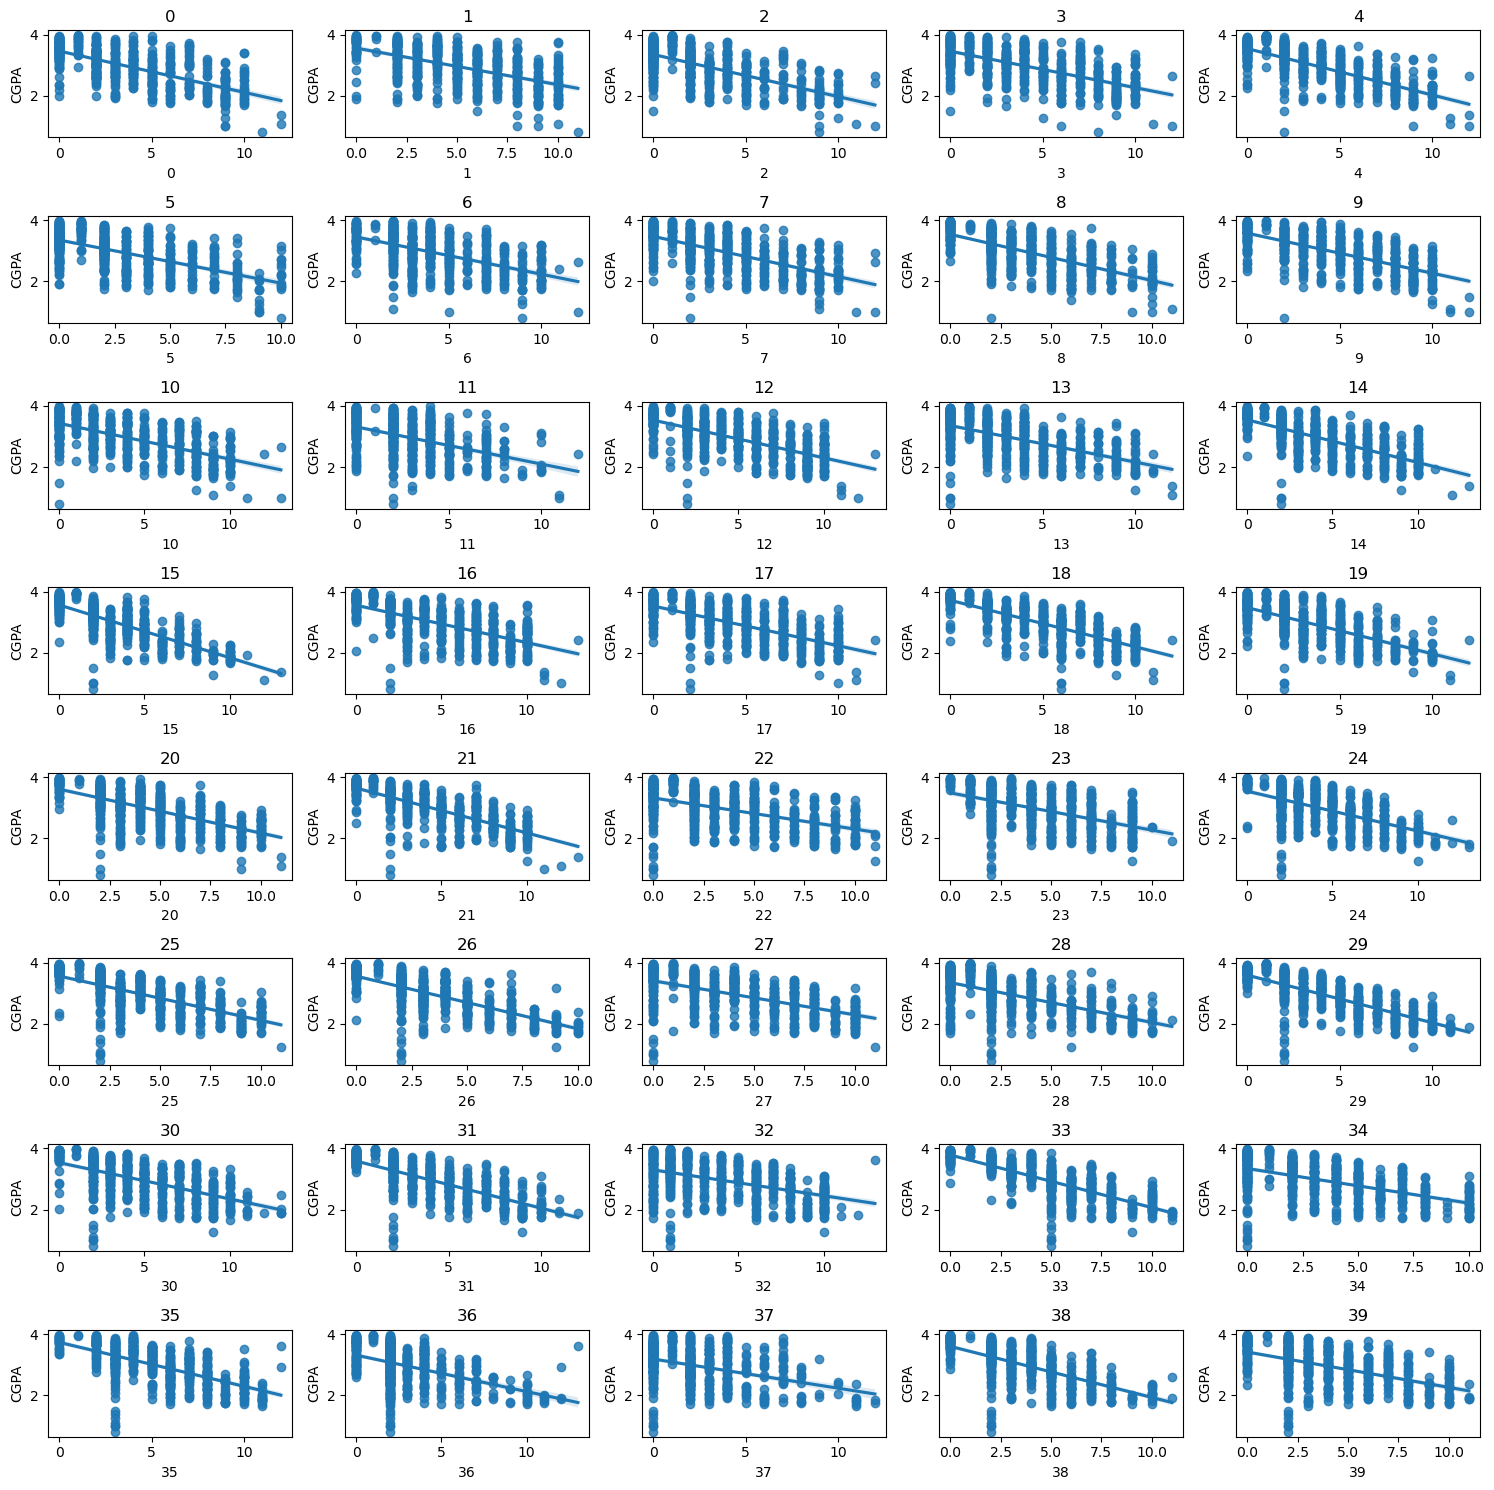

In [28]:
plt.figure(figsize=(15, 15)) 
plot = 1

for column in df3.columns:
    if plot <= 40:
        plt.subplot(8, 5, plot)
        sns.regplot(df3[column], X)
        plt.title(column)  
    plot += 1

plt.tight_layout()
plt.show()

In [29]:
df3.corr()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,1.000000,0.382436,0.557843,0.498561,0.468968,0.609990,0.293963,0.423942,0.579964,0.533558,...,0.472384,0.038184,0.464022,0.321264,0.290351,0.280166,0.152437,0.462770,0.094921,0.293815
1,0.382436,1.000000,0.335074,0.473132,0.432742,0.400713,0.312019,0.349412,0.309697,0.336545,...,0.432533,0.213380,0.364250,0.229546,0.301934,0.265551,0.225977,0.284668,0.228103,0.226039
2,0.557843,0.335074,1.000000,0.510123,0.538380,0.578573,0.378223,0.447539,0.467250,0.464418,...,0.362537,0.261555,0.472137,0.464575,0.349827,0.129957,0.008774,0.430053,0.120885,0.064912
3,0.498561,0.473132,0.510123,1.000000,0.494731,0.482406,0.499093,0.360304,0.400303,0.320137,...,0.484828,0.263143,0.478816,0.451907,0.415946,0.168150,0.142806,0.465352,0.235029,0.153293
4,0.468968,0.432742,0.538380,0.494731,1.000000,0.393684,0.500729,0.555895,0.409161,0.471685,...,0.474400,0.467946,0.555098,0.410540,0.511463,0.300391,0.228637,0.502473,0.400679,0.269792
5,0.609990,0.400713,0.578573,0.482406,0.393684,1.000000,0.286324,0.353949,0.507357,0.455470,...,0.418766,0.059711,0.387639,0.279329,0.236345,0.237615,0.121965,0.306827,0.045134,0.179777
6,0.293963,0.312019,0.378223,0.499093,0.500729,0.286324,1.000000,0.338645,0.269895,0.281233,...,0.338987,0.450752,0.416562,0.426402,0.397195,0.129554,0.108916,0.421989,0.339963,0.185782
7,0.423942,0.349412,0.447539,0.360304,0.555895,0.353949,0.338645,1.000000,0.448908,0.461690,...,0.411977,0.301324,0.466556,0.304240,0.368959,0.253133,0.242234,0.379308,0.369173,0.265289
8,0.579964,0.309697,0.467250,0.400303,0.409161,0.507357,0.269895,0.448908,1.000000,0.572964,...,0.419649,0.156809,0.445496,0.341988,0.359230,0.297664,0.214165,0.465913,0.244615,0.320746
9,0.533558,0.336545,0.464418,0.320137,0.471685,0.455470,0.281233,0.461690,0.572964,1.000000,...,0.401833,0.199848,0.462568,0.336647,0.345832,0.300913,0.154184,0.440407,0.220977,0.293638


In [30]:
""""not found any such correlation""""

SyntaxError: EOL while scanning string literal (2654125094.py, line 1)

In [31]:
aa=pd.DataFrame(X)

In [32]:
new_df=pd.concat([df3,aa],axis=1)

In [33]:
new_df

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,CGPA
0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,8.0,...,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0,2.205
1,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,9.0,...,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0,2.008
2,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,2.0,...,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,3.608
3,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,7.0,...,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0,1.906
4,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,2.0,...,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,4.0,...,2.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0,3.798
567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,4.0,4.0,0.0,0.0,2.0,3.0,2.0,6.0,2.0,3.772
568,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,...,2.0,3.0,0.0,4.0,0.0,6.0,4.0,2.0,2.0,3.470
569,0.0,4.0,9.0,0.0,9.0,10.0,5.0,8.0,5.0,8.0,...,9.0,3.0,3.0,8.0,9.0,6.0,3.0,5.0,6.0,2.193


In [34]:
""""merging CGPA with dataset to look for multicolinearity""""

SyntaxError: EOL while scanning string literal (598452784.py, line 1)

<AxesSubplot:>

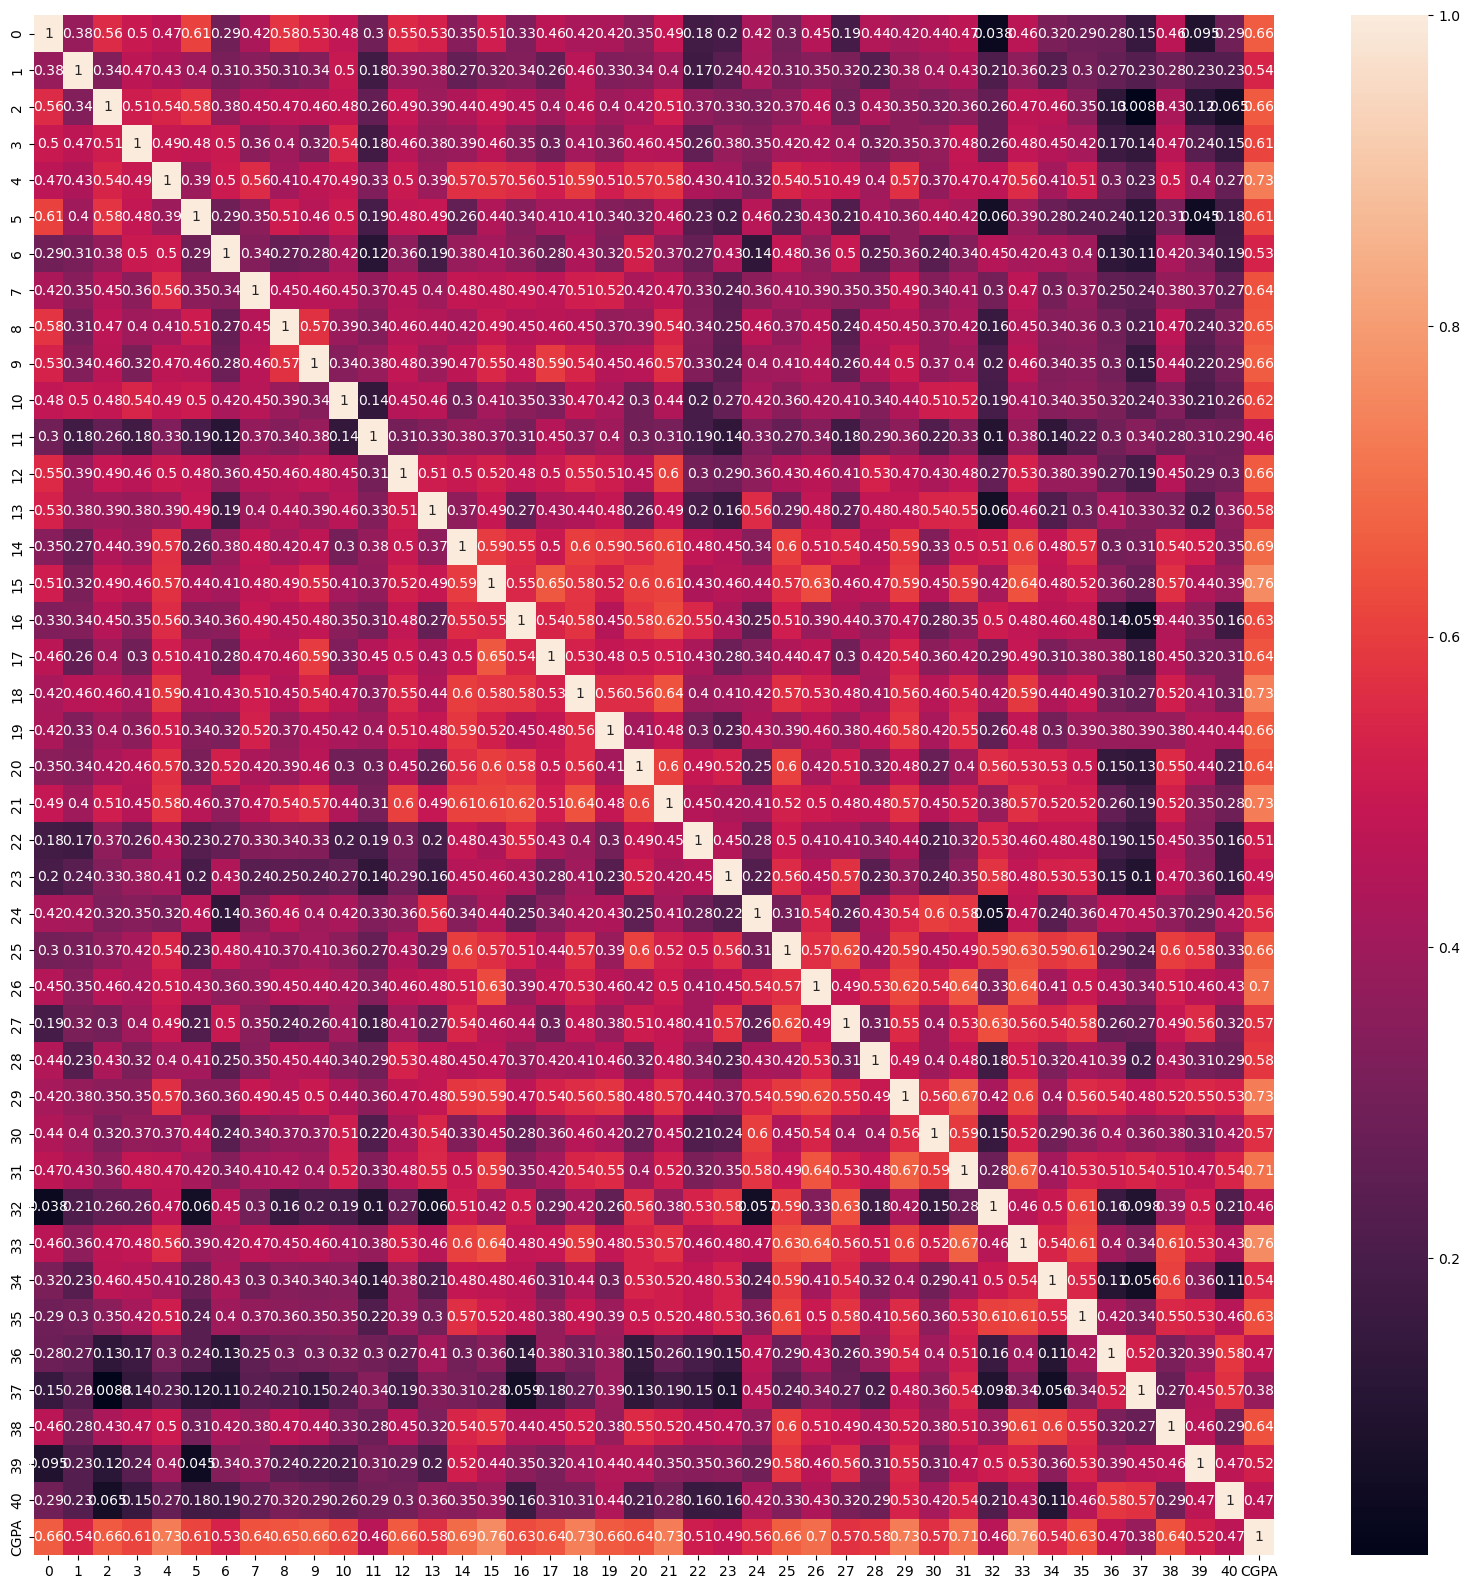

In [35]:
plt.figure(figsize=(20,20))
sns.heatmap(new_df.corr().abs(),annot=True)

In [ ]:
"""" majorly all subject is highly related with targets but dropping some less related columns""""

In [36]:
data=df3.drop([11,37,40,39],axis=1)

In [180]:
data

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,38
0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,8.0,...,4.0,6.0,8.0,6.0,8.0,8.0,8.0,8.0,2.0,8.0
1,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,9.0,...,8.0,6.0,2.0,9.0,10.0,9.0,6.0,9.0,2.0,6.0
2,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,2.0,...,0.0,4.0,2.0,2.0,3.0,3.0,0.0,6.0,0.0,0.0
3,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,7.0,...,8.0,10.0,4.0,8.0,10.0,6.0,10.0,8.0,5.0,7.0
4,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,2.0,...,2.0,2.0,5.0,2.0,5.0,4.0,4.0,5.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,4.0,...,1.0,0.0,0.0,4.0,2.0,2.0,0.0,0.0,0.0,4.0
567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,1.0,2.0,4.0,4.0,0.0,0.0,2.0,2.0
568,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,3.0,7.0,4.0,2.0,3.0,0.0,4.0,0.0,4.0
569,0.0,4.0,9.0,0.0,9.0,10.0,5.0,8.0,5.0,8.0,...,8.0,9.0,5.0,4.0,9.0,3.0,3.0,8.0,9.0,3.0


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(data,X,test_size=.25,random_state=222)

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
ln=LinearRegression()

In [41]:
ln.fit(x_train,y_train)

LinearRegression()

In [42]:
ln.score(x_test,y_test)

0.9588759856491881

In [43]:
ln.score(x_train,y_train)

0.9140803745515595

In [44]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [45]:
y_pred=ln.predict(x_train)

In [46]:
pred=ln.predict(x_test)

In [47]:
mse=mean_squared_error(y_train,y_pred)

In [171]:
mse

0.03137985522780913

In [48]:
from sklearn.metrics import mean_squared_error, r2_score

def metric_score(clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        mse = mean_squared_error(y_train, y_pred)
        r2 = r2_score(y_train, y_pred)
        print("\n-------------Train Result---------\n")
        print(f"R-squared (R2) Score: {r2}")
        print(mse)
    else:
        y_pred = clf.predict(x_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print("\n----------Test Score--------")
        print(f'R-squared (R2) Score: {r2}')
        print(mse)
# Training and evaluating the regression model
metric_score(ln, x_train, x_test, y_train, y_test, train=True)
metric_score(ln, x_train, x_test, y_train, y_test, train=False)



-------------Train Result---------

R-squared (R2) Score: 0.9140803745515595
0.033374335505765254

----------Test Score--------
R-squared (R2) Score: 0.9588759856491881
0.015312953617591153


In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
rf_regressor = RandomForestRegressor(n_estimators=300, random_state=400,n_jobs=-1)


rf_regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=400)

In [52]:
metric_score(rf_regressor, x_train, x_test, y_train, y_test, train=True)
metric_score(rf_regressor, x_train, x_test, y_train, y_test, train=False)


-------------Train Result---------

R-squared (R2) Score: 0.9877755131575312
0.004748439290057115

----------Test Score--------
R-squared (R2) Score: 0.944081966361327
0.020821660263791685


In [ ]:
#randomforest is giving good results

In [53]:
import pickle

In [54]:
pickle.dump(data,open('Student','wb'))